Copyright Amazon.com, Inc. or its affiliates. All Rights Reserved.
SPDX-License-Identifier: Apache-2.0

# 01-SPARQL Basics

Working with Semantic Web knowledge graphs can be a daunting prospect for a newcomer.  Having lots of new acronyms and terms to learn and understand – like RDF, SPARQL and knowledge graph – can been seen as a barrier of entry for these powerful technologies. 

In reality, Semantic Web knowledge graph databases are a very easy and intuitive way to understand, record and traverse data. This is often easier to do using graph databases, and graph query languages, as they are optimized for these types of operation.

In this notebook, we describe the basics of the SPARQL1.1 query language. 

  - [INTRODUCTION](#INTRODUCTION)
  - [RDF1.1](#RDF1.1:-data-formatted-to-be-understood-by-machine-and-man)
  - [NAMESPACES FOR RDF/SPARQL](#NAMESPACES)
  - [SPARQL1.1](#SPARQL1.1:-The-RDF-query-language)
  - [1. INSERT](#1.1-INSERT)
  - [2. SELECT](#1.2-SELECT)
  - [3. FILTER](#1.3-FILTER)
  - [4. OPTIONAL AND UNION](#1.4-OPTIONAL-AND-UNION)
  - [5. GROUP BY](#1.5-GROUP-BY)
  - [6. LIMIT](#1.6-LIMIT)
  - [7. ORDER BY](#1.7-ORDER-BY)
  - [8. DISTINCT](#1.8-DISTINCT)
  - [9. COUNT](#1.9-COUNT)
  
  

## INTRODUCTION

This guide shows you how easy it is to use the powerful features of RDF and SPARQL, and as long as you have a general understanding of how to use a REST API, and some experience with some other kind of database in the past, SQL or NoSQL, you will be able to follow along easily.

*N.B.* You do *NOT* need to understand what RDF, SPARQL, Semantic Web or Linked Data are in order to get benefit from these technologies, or this guide. Cool, huh?

### RDF1.1: Data formatted to be understood by machine and man

Using a graph database such as Amazon Neptune you can store data in a very easy to understand format: RDF. Don’t worry about exactly what RDF is, just that it tries to represent data in the form of “statements”.

For example, let’s make the following statement in natural language:

`“Charlie knows Ora”`

This statement makes a lot of sense to us as humans. So how do we represent this data in RDF?  The following is 100% valid RDF (and don’t worry about the line with *@base* for now, we will get to that later):

`@base <http://example.org/> .
:Charlie :knows :Ora`  

As you can see, representing a real world statement of fact, like `Charlie knows Ora`, is as easy as saying `:Charlie :knows :Ora`

So you see... very easy so far!  

The single statement actually forms a simple graph, illustrated below:

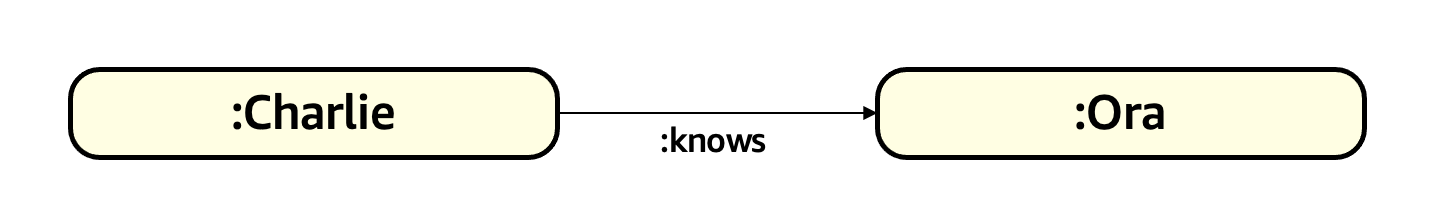

This is really all that RDF is: nodes (in our little graph `:Charlie` and `:Ora`) and edges (`:knows`). Below we will also introduce something called literals, but they are just different kinds of nodes. All RDF graphs are constructed from these elements.  

Edges in RDF link nodes to other nodes, but they can also be used to introduce attributes to nodes themselves. Let’s say we want to indicate how old Ora is, we can do it like this:  

`@base <http://example.org/> .
:Ora :age "29"`

We could have said

`@base <http://example.org/> .
:Ora :hasAge "29"`

or

`@base <http://example.org/> .
:Ora :is "29"`


The string `"29"` is called a literal, and in our graph it would look like this:  
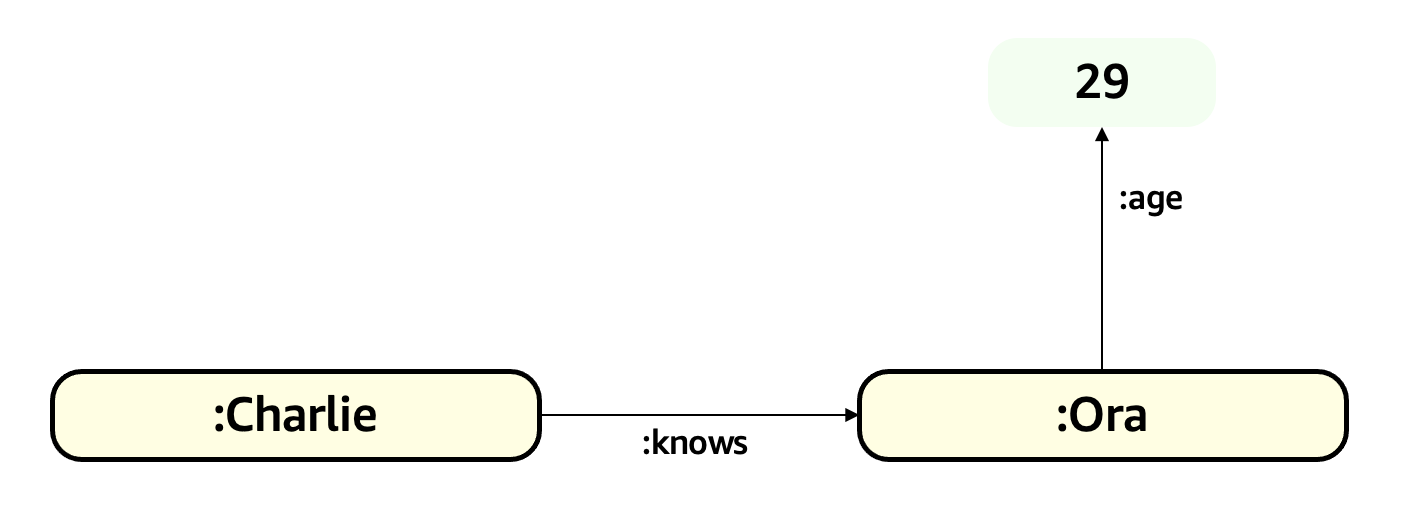
As you can see, it really is just another node. Of course, in this case, the string *"29"* would be just that, a text string. If we wanted to indicate that it is a number (an integer, in fact), we could state it like this:  

`@base <http://example.org/> .
:Ora :age "29"^^xsd:int`  

RDF uses datatypes from XML Schema, and thus they are all prefixed with “xsd:”. But, in fact, you can ignore that for now, because we can write it simpler, like this (note that the quotation marks are now gone):  

`@base <http://example.org/> .
:Ora :age 29`

But one statement alone doesn’t give us much information. We make many statements to make sense of our world, so let’s add a bit more information to our knowledge base, or – dare we say – *Knowledge Graph*:

`@base <http://example.org/> .
:Charlie :knows   :Ora
:Ora     :knows   :Charlie
:Ora     :livesIn :USA
:Charlie :livesIn :UK`

### These statements form a graph:

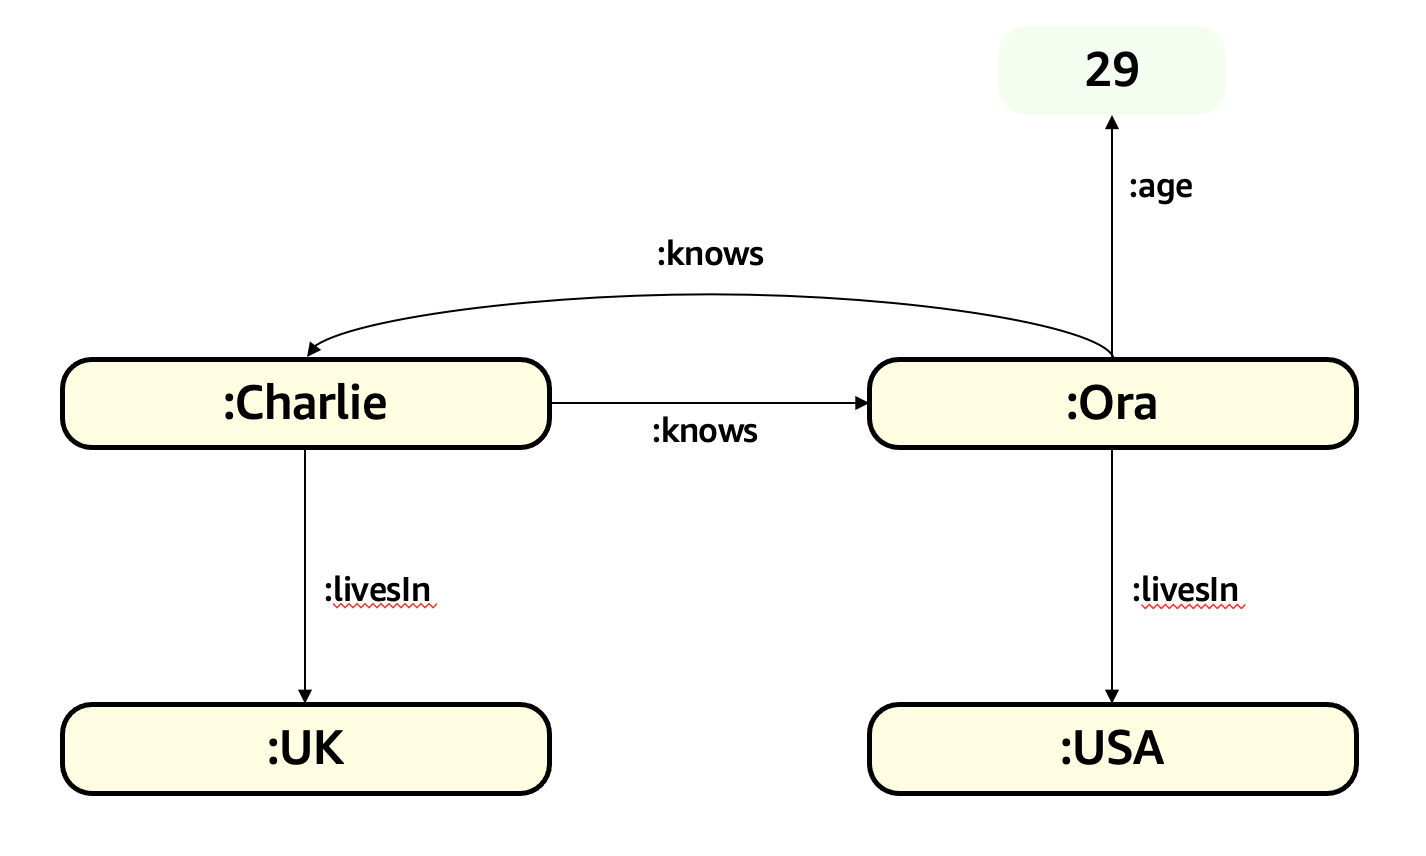


## NAMESPACES

You will notice that throughout this guilde you will see either

`@base <http://example.org/> .`

At the top of an RDF snippit, or

`PREFIX : <http://example.org/>`

At the top of a SPARQL query. 

This is the BASE `NAMESPACE` or `PREFIX`, and provides a short hand way of writing RDF and SPARQL queries, by substituting the value of the PREFIX with the ":" charachter in the SPARQL query or RDF snippit.

For example:

`@base <http://example.org/> .
:Ora :age 29`

Is equivalent to:

`<http://example.org/Ora> <http://example.org/age> 29`

N.B. When using a PREFIX or NAMESPACE, you do not need to enclose IRI's in chevrons `<http://example.org/age>`, you only need to begin with the PREFIX `:age`

It is called the BASE prefix because it has no specific value. You could also understand it as the DEFAULT PREFIX.
You can add as many PREFIX's as you like to your SPARQL or RDF.

The following fragments are some of the different ways to write the same IRI in SPARQL:

`<http://example.org/book/book1>`

`BASE <http://example.org/book/>
<book1>`

`PREFIX book: <http://example.org/book/>
book:book1`




## SPARQL1.1: The RDF query language

### 1.1 INSERT

To insert your data, simply wrap your statements inside an INSERT clause, as shown below. This query is executable, and will insert your data into your Amazon Neptune cluster. Execute the following cell (ctrl+enter) to insert the data:

In [ ]:
%%sparql
PREFIX : <http://example.org/> 

INSERT DATA {
    :Charlie :knows   :Ora .
    :Ora     :knows   :Charlie .
    :Ora     :livesIn :USA .
    :Charlie :livesIn :UK .
    :Ora     :age     29
}

Our graph will now look like this:

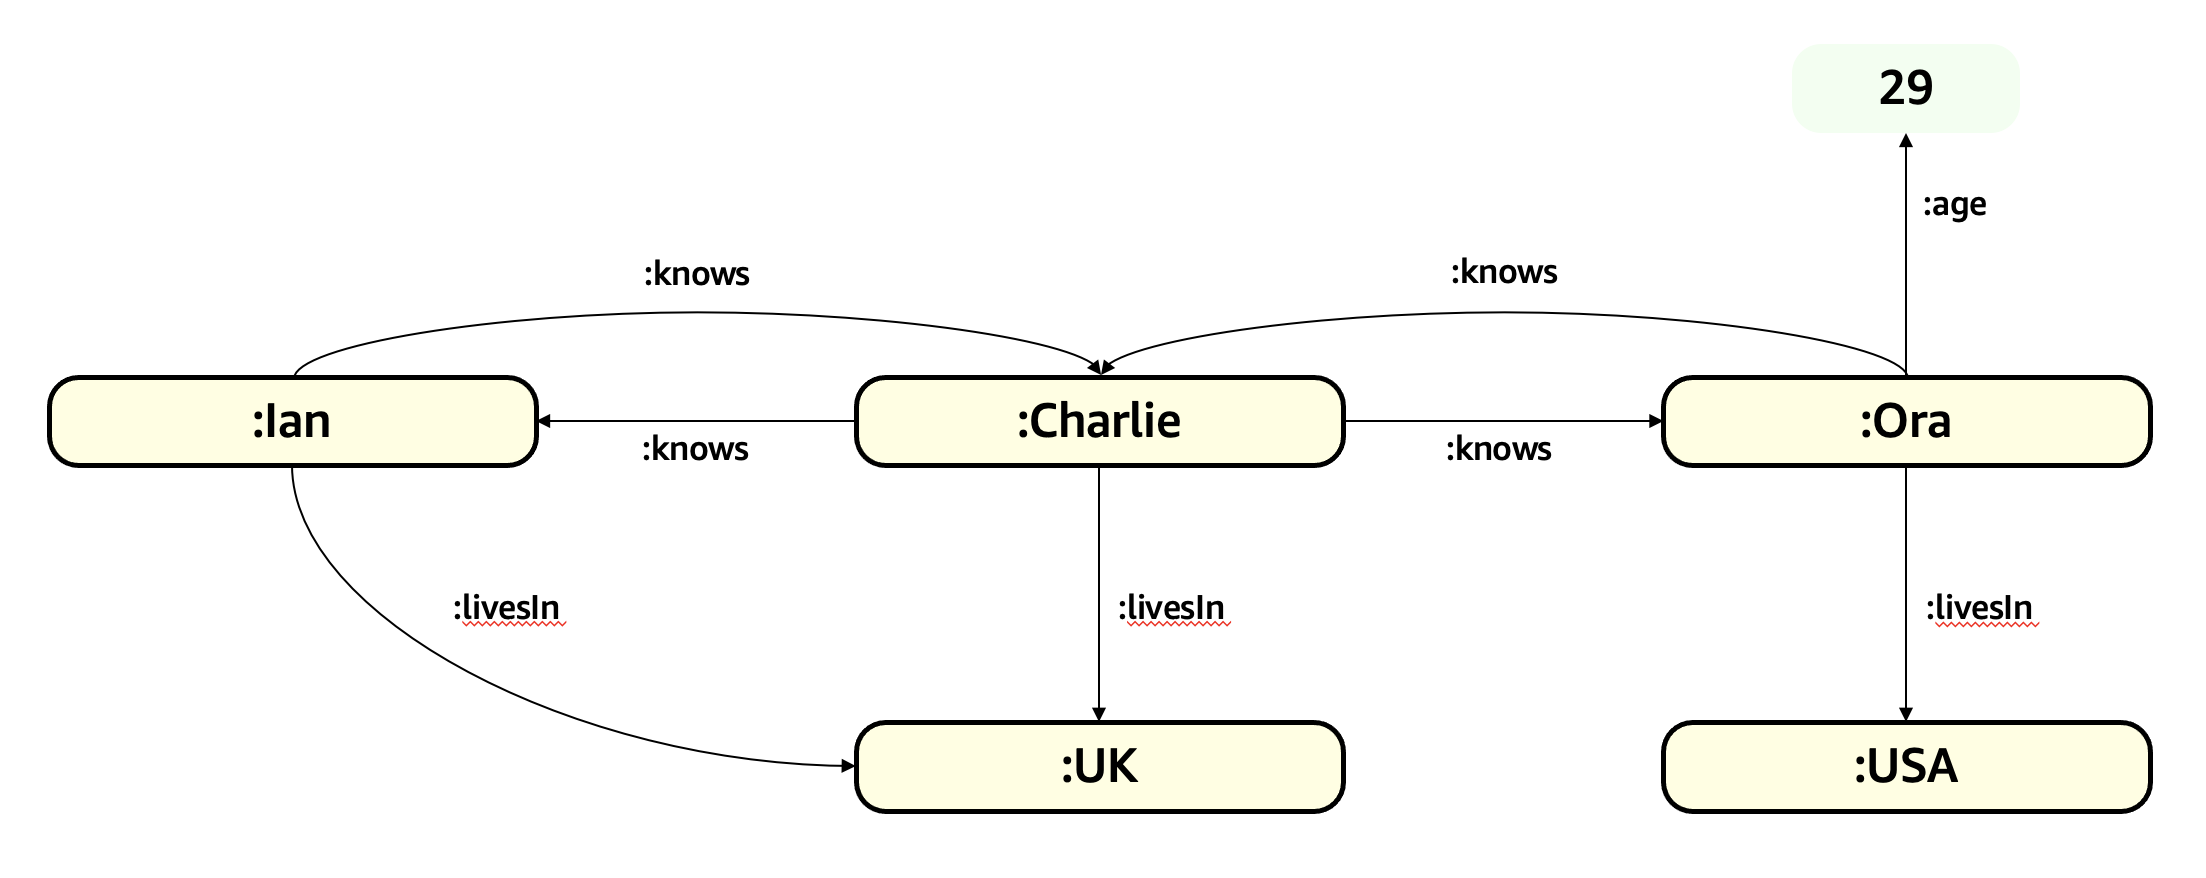

To add more data, you simply issue another INSERT query. Let’s add a few more statements into the database, just to allow us later to show some more examples of how to query the data:

In [ ]:
%%sparql
PREFIX : <http://example.org/> 

INSERT DATA {
    :Charlie :knows   :Ian .
    :Ian     :knows   :Charlie .
    :Ian     :livesIn :UK .
    :Charlie :age     37 .
    :Ian     :age     42 .
}

Our graph will now look like this:

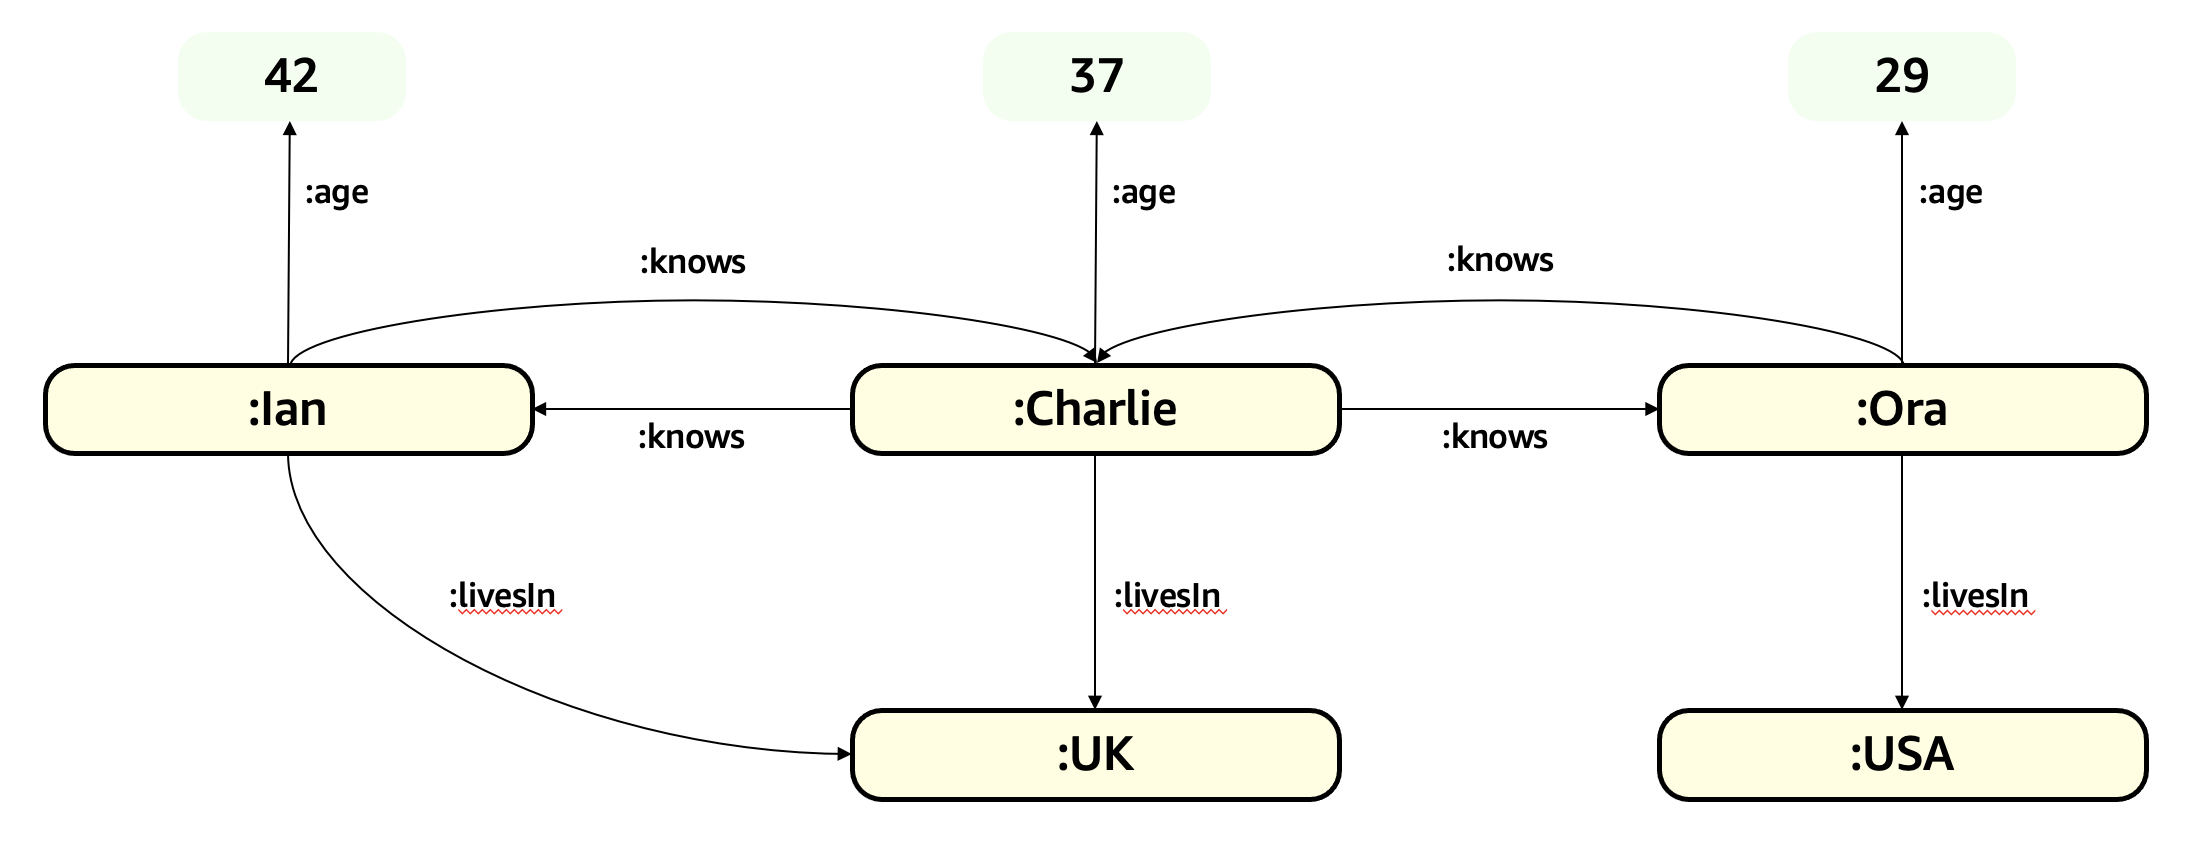

### 1.2 SELECT

Let’s see what kind of questions we can ask our little graph so far. In their simplest form, SPARQL queries are like RDF statements, with the things you are asking for replaced with variables (these are simply names preceded by a question mark). For example, this is a variable: 

`?person.`

Question: “Who does Charlie know?” ... 

In [ ]:
%%sparql

PREFIX : <http://example.org/> 

SELECT ?person
{
    :Charlie :knows ?person .
}

A SELECT query specifies which variables are returned as part of the solution. You can return any number of variables, and there can be any number of solutions (including zero). Think of the solutions as rows and the variables as columns; note that this is similar to how SQL query results are returned. Given our sample graph, we have only two solutions:

<table align="left">
    <tr>
        <th><p align=left>person</th>
    </tr>
    <tr>
        <td><p align=left>http://example.org/Ora</p></td>
    </tr>
    <tr>
        <td><p align=left>http://example.org/Ian</p></td>
    </tr>
</table>

Question: “Who lives in the USA?” ...

In [ ]:
%%sparql 

PREFIX : <http://example.org/> 

SELECT ?person
{
    ?person :livesIn :USA .
}

Question: "Who does Charlie know who lives in the USA?" ...

In [ ]:
%%sparql

PREFIX : <http://example.org/> 

SELECT ?person
{
    :Charlie :knows   ?person .
    ?person  :livesIn :USA .
}

Normally, all the statements with variables (they are called “basic graph patterns” – BGP for short – in SPARQL) have to be satisfied using the same selection of variable values. So in the above query, the `?person` in the first BGP has to be the same `?person` appearing in the second BGP.  

You can think of the query as sort of a “template” you have to match against the graph. This here would be a graphical representation of the query:

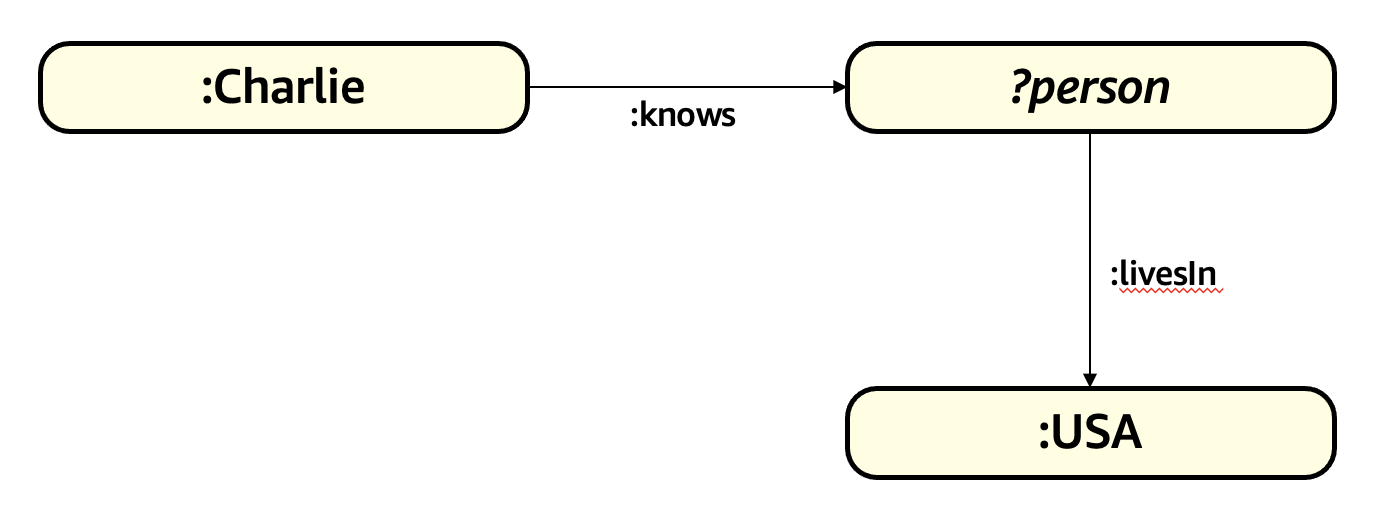

Question: "Whom does Charlie know that lives in the same country as Charlie?"

In [ ]:
%%sparql 

PREFIX : <http://example.org/> 

SELECT ?person
{
    :Charlie :knows   ?person .
    :Charlie :livesIn ?country .
    ?person  :livesIn ?country .
}

In this query we introduce a new variable, ?country, but it is not part of the results we return, we merely use it within the query to get to the answer we are looking for.  

Just like in the previous example, we can imagine a graph that illustrates the query:

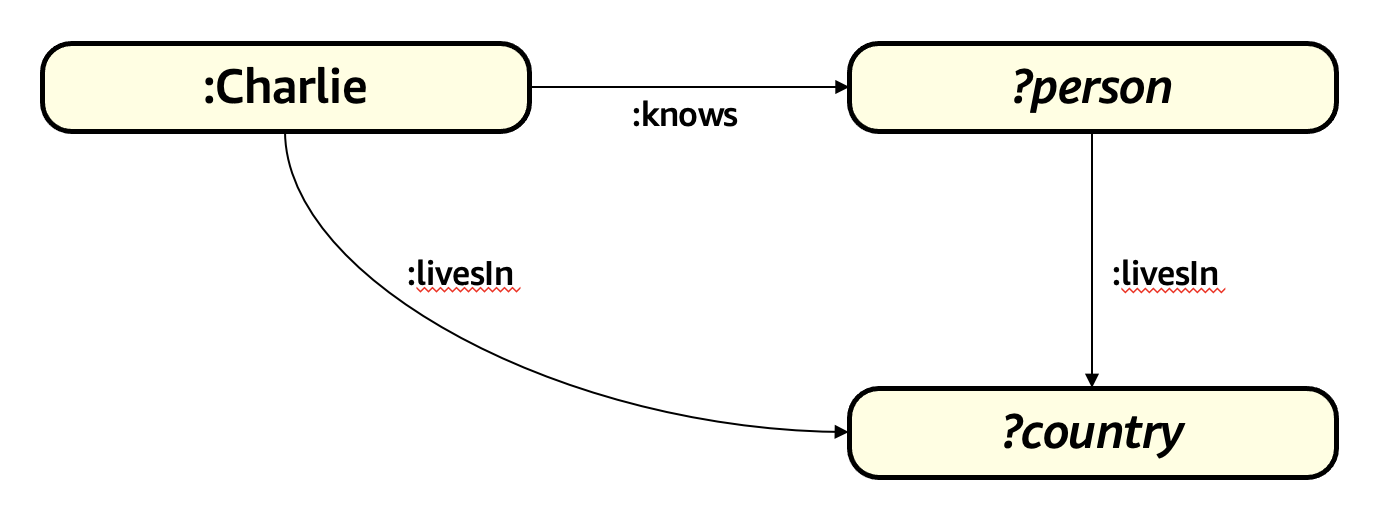

Note that this last example could also be written like this:

In [ ]:
%%sparql

PREFIX : <http://example.org/> 

SELECT ?person
{
    :Charlie :knows ?person ; 
             :livesIn ?country .
             
    ?person  :livesIn ?country .
}

By using the semicolon to separate patterns we indicate that they are all about `:Charlie`. This is a shorthand technique that sometimes makes queries clearer and easier to write.

### 1.3 FILTER

Now we can introduce some filtering.

Query: "Does Charlie know anyone under 30 years old?"

In [ ]:
%%sparql 

PREFIX : <http://example.org/> 

SELECT ?person
{
    :Charlie :knows ?person .
    ?person  :age   ?age .
    FILTER (?age < 30)
}

This kind of a `FILTER` clause is a simple way to introduce additional logical constraints that the solution has to satisfy.

### 1.4 OPTIONAL AND UNION

Now insert some more data:

In [ ]:
%%sparql

PREFIX : <http://example.org/> 
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

INSERT DATA 
{
    :Ian         a :Author     .
    :Charlie     a :Author     .
    :Ora         a :Author     .
    
    :Ora :published :TheSemanticWeb .
    :Ora :published :ProgrammingSemanticWebApplications .
    :Ian :published :GraphDatabases .
    
    :TheSemanticWeb                     :about     :SemanticWeb    .
    :ProgrammingSemanticWebApplications :about     :SemanticWeb    .
    :GraphDatabases                     :about     :GraphDatabases .
    
    :TheSemanticWeb                     :costs "20"^^xsd:integer .
    :ProgrammingSemanticWebApplications :costs "10"^^xsd:integer .
    :GraphDatabases                     :costs "25"^^xsd:integer .
    
}

#### OPTIONAL: 
     
OPTIONAL is used when you are not sure if a particular statement exists, but you still want to return the rest of the data, whether the OPTIONAL statement exists or not.

In this example, we want to return ALL the people who are Authors, and also list any papers that were written about "The Semantic Web". Without the OPTIONAL clause, the query would only return Authors who have published a paper about "The Semantic Web", and not those who haven’t.

`Consider the differences between the following two queries:`

1. Return all people who are Authors, whether they have published a paper about the Semantic Web or not is an OPTIONAL fact to the query, but we still want to include any papers that were published about the Semantic Web.

In [ ]:
%%sparql

PREFIX : <http://example.org/> 

SELECT ?author ?publication
{
    ?author a :Author     .
    
    OPTIONAL { 
        ?author       :published ?publication .
        ?publication  :about     :SemanticWeb
    }
    
}

*The result set:*
Containing all people who are Authors, and listing their publications if they made any about The Semantic Web 

<table align="left">
    <tr>
        <th><p align=left>author</th>
        <th><p align=left>publication</th>
    </tr>
    <tr>
        <td><p align=left>http://example.org/Ora</p></td>
        <td><p align=left>http://example.org/TheSemanticWeb</p></td>
    </tr>
    <tr>
        <td><p align=left>http://example.org/Ora</p></td>
        <td><p align=left>http://example.org/ProgrammingSemanticWebApplications</p></td>
    </tr>
    <tr>
        <td><p align=left>http://example.org/Charlie</p></td>
        <td><p align=left>-</p></td>
    </tr>
    <tr>
        <td><p align=left>http://example.org/Ian</p></td>
        <td><p align=left>-</p></td>
    </tr>
</table>

2. Only return Authors who have published something about the Semantic Web, and list their papers. 

In [ ]:
%%sparql

PREFIX : <http://example.org/> 

SELECT ?author ?publication
{
    ?author a :Author     .
    
    ?author       :published ?publication .
    ?publication  :about     :SemanticWeb
         
}

*The result set:*
By removing the OPTIONAL clause, we will only return people who have published a paper about the Semantic Web, as this statement is no longer OPTIONAL.

<table align="left">
    <tr>
        <th><p align=left>author</th>
        <th><p align=left>publication</th>
    </tr>
    <tr>
        <td><p align=left>http://example.org/Ora</p></td>
        <td><p align=left>http://example.org/TheSemanticWeb</p></td>
    </tr>
    <tr>
        <td><p align=left>http://example.org/Ora</p></td>
        <td><p align=left>http://example.org/ProgrammingSemanticWebApplications</p></td>
</table>

#### UNION

UNION is used to aggregate results from two or more patterns. 

Run this query to UNION the authors that have published either a paper about `:SemanticWeb` or about `:GraphDatabases` 

In [ ]:
%%sparql

PREFIX : <http://example.org/> 

SELECT ?author ?publication
{
    
    ?author a          :Author ;
            :published ?publication .
    
    {
        ?publication :about     :GraphDatabases
    }
    UNION 
    {
        ?publication :about     :SemanticWeb
    }
    
}

*The result set:*
We now have a UNION of papers published that are about either the Semantic Web or Graph Databases.

<table align="left">
    <tr>
        <th><p align=left>author</th>
        <th><p align=left>publication</th>
    </tr>
    <tr>
        <td><p align=left>http://example.org/Ora</p></td>
        <td><p align=left>http://example.org/TheSemanticWeb</p></td>
    </tr>
    <tr>
        <td><p align=left>http://example.org/Ora</p></td>
        <td><p align=left>http://example.org/ProgrammingSemanticWebApplications</p></td>
    </tr>
    <tr>
        <td><p align=left>http://example.org/Ian</p></td>
        <td><p align=left>http://example.org/GraphDatabases</p></td>
    </tr>
</table>

### 1.5 GROUP BY

GROUP BY in SPARQL operates very similarly to the SQL “GROUP BY” aggregator, in that it will group results based on a shared value or parameter.

1. Group by the author to return a list of people who have authored anything, without returning duplicate results.

In [ ]:
%%sparql

PREFIX : <http://example.org/> 

SELECT ?author 
{
    ?author a :Author .
    ?author :published ?paper . 
    
} group by ?author

*The result set:*
By grouping by the `“?person”` we ensure that we will only return one row per person.

<table align="left">
    <tr>
        <th><p align=left>Person</th>
    </tr>
    <tr>
        <td><p align=left>http://example.org/Ora</p></td>
    </tr>
    <tr>
        <td><p align=left>http://example.org/Ian</p></td>
    </tr>
</table>

2. Get a list of people for each paper they have published.

In [ ]:
%%sparql 

PREFIX : <http://example.org/> 

SELECT ?person
{
    ?person a :Author .
    ?person :published ?paper . 
    
}

*The result set:*
By removing the "group by" we will get a result for each paper published.

<table align="left">
    <tr>
        <th><p align=left>Person</th>
    </tr>
    <tr>
        <td><p align=left>http://example.org/Ora</p></td>
    </tr>
    <tr>
        <td><p align=left>http://example.org/Ora</p></td>
    </tr>
    <tr>
        <td><p align=left>http://example.org/Ian</p></td>
    </tr>
</table>

3. Adding filtering to your “GROUP BY“ will provide much more powerful aggregation, here we are GROUPING by the ”?person“ and then adding a function (GROUP_CONCAT) to the SELECT clause, to return every person with their publication names concatenated

In [ ]:
%%sparql

PREFIX : <http://example.org/> 

SELECT ?author (GROUP_CONCAT(?publication;SEPARATOR=", ") AS ?publications)
{
    ?author a :Author .
    ?author :published ?publication .

} GROUP BY ?author

*The result set:*
By concatinating the "?publication"s, we can get an easily readable result set. 


<table align="left">
    <tr>
        <th><p align=left>authors</th>
        <th><p align=left>publications</th>
    </tr>
    <tr>
        <td><p align=left>http://example.org/Ora</p></td>
        <td><p align=left>http://example.org/TheSemanticWeb, http://example.org/ProgrammingSemanticWebApplications</p></td>
    </tr>
    <tr>
        <td><p align=left>http://example.org/Ian</p></td>
        <td><p align=left>http://example.org/GraphDatabases</p></td>
    </tr>
</table>

4. There are lots of useful functions you can use in conjuction with grouped results in SPARQL. Here we use the SUM function to find out how much it would cost to buy all of the publications published by each Author:

In [ ]:
%%sparql

PREFIX : <http://example.org/> 

SELECT ?author (SUM(?dollarCost) AS ?totalCost)
{
    ?author        a             :Author .
    ?author        :published    ?publication .
    ?publication   :costs        ?dollarCost

} GROUP BY ?author 

*The result set:* 


<table align="left">
    <tr>
        <th><p align=left>Person</th>
        <th><p align=left>totalCost</th>
    </tr>
    <tr>
        <td><p align=left>http://example.org/Ora</p></td>
        <td><p align=left>30</p></td>
    </tr>
    <tr>
        <td><p align=left>http://example.org/Ian</p></td>
        <td><p align=left>25</p></td>
    </tr>
</table>

5. Now we combine the two aggregations...

In [ ]:
%%sparql

PREFIX : <http://example.org/> 

SELECT  ?author 
        (SUM(?dollarCost) AS ?totalCost)
        (GROUP_CONCAT(?publication;SEPARATOR=", ") AS ?publications)
{
    ?author        a             :Author .
    ?author        :published    ?publication .
    ?publication   :costs        ?dollarCost

} group by ?author

*The result set:*
Now we can see all the names of the publications grouped together, along with the total cost to buy all the publications from each author.

<table align="left">
    <tr>
        <th><p align=left>author</th>
        <th><p align=left>totalCost</th>
        <th><p align=left>publications</th>
    </tr>
    <tr>
        <td><p align=left>http://example.org/Ora</p></td>
        <td><p align=left>30</p></td>
        <td><p align=left>http://example.org/TheSemanticWeb, http://example.org/ProgrammingSemanticWebApplications</p></td>
    </tr>
    <tr>
        <td><p align=left>http://example.org/Ian</p></td>
        <td><p align=left>25</p></td>
        <td><p align=left>http://example.org/GraphDatabases</p></td>
    </tr>
</table>

6. We can also add filtering, using the HAVING clause. here we will return results where the total cost to buy all  publications from an author is below $30.

In [ ]:
%%sparql

PREFIX : <http://example.org/> 

SELECT  ?author 
        (SUM(?dollarCost) AS ?totalCost)
        (GROUP_CONCAT(?publication;SEPARATOR=", ") AS ?publications)
{
    ?author        a             :Author .
    ?author        :published    ?publication .
    ?publication   :costs        ?dollarCost

} GROUP BY ?author 
HAVING (?totalCost < 30)

*The result set:*
Notice that we can apply the HAVING filter to a binding variable which has been defined in the SELECT clause.


<table align="left">
    <tr>
        <th><p align=left>person</th>
        <th><p align=left>totalCost</th>
        <th><p align=left>papers</th>
    </tr>
    <tr>
        <td><p align=left>http://example.org/Ian</p></td>
        <td><p align=left>25</p></td>
        <td><p align=left>http://example.org/GraphDatabases</p></td>
    </tr>
</table>

### 1.6 LIMIT

Let's insert some more data:

In [ ]:
%%sparql

PREFIX : <http://example.org/> 
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

INSERT DATA 
{
    :Kelvin      a :Author     .
    :Dave        a :Author     .
    
    :Dave    :published :GraphDatabasesInAction .
    :Kelvin  :published :PracticalGremlin .
    
    :GraphDatabasesInAction             :about     :GraphDatabases .
    :PracticalGremlin                   :about     :GraphDatabases .
    
    :GraphDatabasesInAction             :costs "20"^^xsd:integer .
    :PracticalGremlin                   :costs "25"^^xsd:integer .
}

Now, let's run a query to list all the authors with their publications:

In [ ]:
%%sparql

PREFIX : <http://example.org/> 
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT ?author ?publication WHERE
{
    ?author    :published ?publication.    
}

*The result set:*  
A list of all publications and their authors.


<table align="left">
    <tr>
        <th><p align=left>author</th>
        <th><p align=left>publication</th>
    </tr>
    <tr>
        <td><p align=left>http://example.org/Ora</p></td>
        <td><p align=left>http://example.org/GraphDatabases</p></td>
    </tr>
    <tr>
        <td><p align=left>http://example.org/Ora</p></td>
        <td><p align=left>http://example.org/ProgrammingSemanticWebApplications</p></td>
    </tr>
    <tr>
        <td><p align=left>http://example.org/Ian</p></td>
        <td><p align=left>http://example.org/GraphDatabases</p></td>
    </tr>
    <tr>
        <td><p align=left>http://example.org/Dave</p></td>
        <td><p align=left>http://example.org/GraphDatabasesInAction</p></td>
    </tr>
    <tr>
        <td><p align=left>http://example.org/Kelvin</p></td>
        <td><p align=left>http://example.org/PracticalGremlin</p></td>
    </tr>
</table>

Now, let's LIMIT the result set to a maximum of 2 results:

In [ ]:
%%sparql

PREFIX : <http://example.org/> 

SELECT ?author ?publication WHERE
{
    ?author    :published ?publication.    
} 
LIMIT 2

*The result set:* The first 2 results.

<table align="left">
    <tr>
        <th><p align=left>author</th>
        <th><p align=left>publication</th>
    </tr>
    <tr>
        <td><p align=left>http://example.org/Ora</p></td>
        <td><p align=left>http://example.org/GraphDatabases</p></td>
    </tr>
    <tr>
        <td><p align=left>http://example.org/Ora</p></td>
        <td><p align=left>http://example.org/ProgrammingSemanticWebApplications</p></td>
    </tr>
</table>

### 1.7 ORDER BY

ORDER BY in SPARQL can order your result set of URI or LITERAL values alphabetically, in a descending or ascending order. The default order is 'ascending'. 

Run the following query to order the response alphabetically:

In [ ]:
%%sparql

PREFIX : <http://example.org/> 
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT ?author ?publication WHERE
{
    ?author    :published ?publication.    
}  
ORDER BY ?publication 

You can also order by multiple result sets, see the below example of ordering by `price` in ascending order and then by `author` in descending order:

In [ ]:
%%sparql

PREFIX : <http://example.org/> 
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT ?publication ?price WHERE
{
    ?author    :published ?publication.    
    ?publication :costs ?price .
}  
ORDER BY asc(?price) desc(?author)

### 1.8 DISTINCT

Distinct is another aggregator that behaves in an almost identical way to it’s namesake in many SQL databases.  
Let's run a query to list all the people who have authored a publication:


In [ ]:
%%sparql

PREFIX : <http://example.org/> 

SELECT ?author WHERE
{
    ?author :published ?publication.    
} 

*The result set:* As you can see, you get a result for every publication in the database, which in this case is unnecessary repetition. 

<table align="left">
    <tr>
        <th><p align=left>author</th>
    </tr>
    <tr>
        <td><p align=left>http://example.org/Ora</p></td>
    </tr>
    <tr>
        <td><p align=left>http://example.org/Ora</p></td>
    </tr>
    <tr>
        <td><p align=left>http://example.org/Ian</p></td>
    </tr>
    <tr>
        <td><p align=left>http://example.org/Dave</p></td>
    </tr>
    <tr>
        <td><p align=left>http://example.org/Kelvin</p></td>
    </tr>
</table>

By using the `DISTINCT` modifier, you can ensure you get a distinct set of authors:

In [ ]:
%%sparql

PREFIX : <http://example.org/> 

SELECT DISTINCT ?author WHERE
{
    ?author :published ?publication.    
} 

### 1.9 COUNT

Use COUNT to collect and count the resolution set for a particular variable, COUNT will only work with aggregation.  
Let's count how many publications each author has published

In [ ]:
%%sparql

PREFIX : <http://example.org/> 

SELECT ?author (count(?publication) as ?pubCount) WHERE
{
    ?author a :Author .
    ?author :published ?publication .
} 
GROUP BY ?author 

Adding an OPTIONAL clause, means we can return a count for those who have not published anything:

In [ ]:
%%sparql 
PREFIX : <http://example.org/> 

SELECT ?author (count(?publication) as ?pubCount) WHERE
{
    ?author a :Author .
    OPTIONAL { 
         ?author :published ?publication .
    }    
} 
GROUP BY ?author

## Conclusion

This notebook shows how easy it is to use create, select and filter RDF data with Amazon Neptune using the SPARQL1.1 query language.

If you are interested in learning more about Amazon Neptune, we recommend the following resources:

  - [Getting Started with Amazon Neptune](https://pages.awscloud.com/AWS-Learning-Path-Getting-Started-with-Amazon-Neptune_2020_LP_0009-DAT.html) is a video-based learning path that shows you how to create and connect to a Neptune database, choose a data model and query language, author and tune graph queries, and integrate Neptune with other Amazon Web services.
  - Before you begin designing your database, consult the [Amazon Web Services Reference Architectures for Using Graph Databases](https://github.com/aws-samples/aws-dbs-refarch-graph/) GitHub repo, where you can browse examples of reference deployment architectures, and learn more about building a graph data model and choosing a query language.
  - For links to documentation, blog posts, videos, and code repositories with samples and tools, see the [Amazon Neptune developer resources](https://aws.amazon.com/neptune/developer-resources/).
  - Neptune ML makes it possible to build and train useful machine learning models on large graphs in hours instead of weeks. To find out how to set up and use a graph neural network, see [Using Amazon Neptune ML for machine learning on graphs](https://docs.aws.amazon.com/neptune/latest/userguide/machine-learning.html).